## Exploratory Data Analysis

Use this notebook to get familiar with the datasets we have. There is 10 questions we need to answer during the EDA.


We shouldn't limit our EDA to these 10 questions. Let's be creative :).

In [4]:
import pandas as pd
import psycopg2

connection = psycopg2.connect(
    host="mid-term-project.ca2jkepgjpne.us-east-2.rds.amazonaws.com",
    database="mid_term_project",
    user="lhl_student",
    password="lhl_student",
    port=5432
)

#### **Task 1**: Test the hypothesis that the delay is from Normal distribution. and that **mean** of the delay is 0. Be careful about the outliers.

#### **Task 2**: Is average/median monthly delay different during the year? If yes, which are months with the biggest delays and what could be the reason?

#### **Task 3**: Does the weather affect the delay? 
Use the API to pull the weather information for flights. There is no need to get weather for ALL flights. We can choose the right representative sample. Let's focus on four weather types:
- sunny
- cloudy
- rainy
- snow.
Test the hypothesis that these 4 delays are from the same distribution. If they are not, which ones are significantly different?

#### **Task 4**: How taxi times changing during the day? Does higher traffic lead to bigger taxi times?

#### **Task 5**: What is the average percentage of delays that is already created before departure? (aka are arrival delays caused by departure delays?) Are airlines able to lower the delay during the flights?

#### **Task 6**: How many states cover 50% of US air traffic? 

#### **Task 7**: Test the hypothesis whether planes fly faster when there is the departure delay? 

#### **Task 8**: When (which hour) do most 'LONG', 'SHORT', 'MEDIUM' haul flights take off?

In [257]:
df_hauls = pd.read_sql_query('SELECT crs_elapsed_time, crs_dep_time FROM flights LIMIT 660556;', connection)
df_hauls.head()

,crs_elapsed_time,crs_dep_time
0,118.0,630
1,104.0,1959
2,100.0,1700
3,112.0,2210
4,153.0,1546


In [258]:
df_hauls.isnull().sum()

crs_elapsed_time    0
crs_dep_time        0
dtype: int64

In [259]:
df_hauls['departure_hour'] = df_hauls['crs_dep_time']//100
df_hauls.loc[df_hauls['crs_elapsed_time'] <= 180, 'haul_class'] = 'Short'
df_hauls.loc[(df_hauls['crs_elapsed_time'] > 180) & (df_hauls['crs_elapsed_time'] <= 360), 'haul_class'] = 'Medium'
df_hauls.loc[df_hauls['crs_elapsed_time'] > 360, 'haul_class'] = 'Long'
df_hauls = df_hauls.drop(['crs_elapsed_time', 'crs_dep_time'], axis=1)
df_hauls.head()

,departure_hour,haul_class
0,6,Short
1,19,Short
2,17,Short
3,22,Short
4,15,Short


In [260]:
means = df_hauls.groupby(df_hauls.haul_class).mean()
means

,departure_hour
haul_class,
Long,13.349065
Medium,12.778049
Short,13.052777


<BarContainer object of 3 artists>

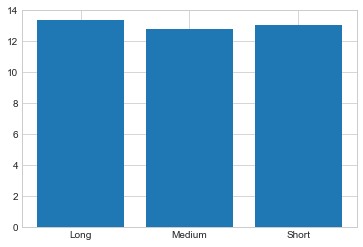

In [261]:
plt.bar(means.index, means.departure_hour)

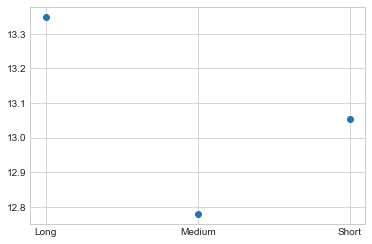

In [262]:
plt.scatter(means.index, means.departure_hour)

#### No signficant patterns. All length flights depart around 13:00

#### **Task 9**: Find the top 10 the busiest airports. Does the biggest number of flights mean that the biggest number of passengers went through the particular airport? How much traffic do these 10 airports cover?

In [62]:
df_airport_passengers = pd.read_sql_query('SELECT origin, origin_city_name, dest, dest_city_name, passengers FROM passengers LIMIT 660556;', connection)
df_airport_passengers.head()

,origin,origin_city_name,dest,dest_city_name,passengers
0,DEN,"Denver, CO",DAY,"Dayton, OH",106.0
1,DEN,"Denver, CO",DSM,"Des Moines, IA",120.0
2,DEN,"Denver, CO",MTJ,"Montrose/Delta, CO",127.0
3,DSM,"Des Moines, IA",DEN,"Denver, CO",134.0
4,DTW,"Detroit, MI",BDL,"Hartford, CT",181.0


In [63]:
df_airport_passengers.dtypes

origin               object
origin_city_name     object
dest                 object
dest_city_name       object
passengers          float64
dtype: object

In [64]:
df_airport_passengers.isnull().sum()  #no nulls

origin              0
origin_city_name    0
dest                0
dest_city_name      0
passengers          0
dtype: int64

## 10 Busiest Airports

In [65]:
dest = df_airport_passengers.groupby('dest_city_name').size()
origin = df_airport_passengers.groupby('origin_city_name').size()
busy = dest+origin
busy.sort_values(ascending=False).head(10)

Chicago, IL        52834.0
Atlanta, GA        37361.0
Denver, CO         36025.0
Houston, TX        32962.0
New York, NY       32170.0
Los Angeles, CA    28501.0
Washington, DC     27920.0
Detroit, MI        27354.0
Minneapolis, MN    26797.0
Newark, NJ         26683.0
dtype: float64

In [66]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

Text(0.5, 1.0, 'Busiest Airports')

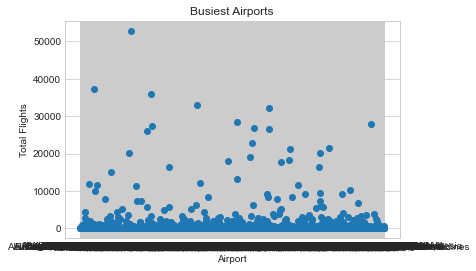

In [67]:
plt.scatter(busy.index, busy.values)
plt.xlabel('Airport')
plt.ylabel('Total Flights')
plt.title('Busiest Airports')

Text(0.5, 1.0, '10 Busiest Airports')

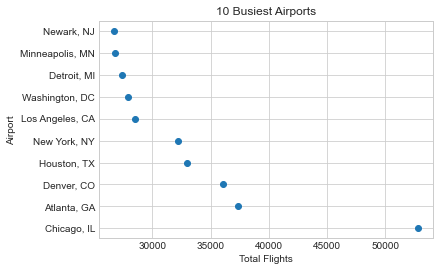

In [69]:
plt.scatter(busy.nlargest(n=10).values, busy.nlargest(n=10).index)
plt.xlabel('Total Flights')
plt.ylabel('Airport')
plt.title('10 Busiest Airports')

## Passengers

In [70]:
df_airport_passengers.head()

,origin,origin_city_name,dest,dest_city_name,passengers
0,DEN,"Denver, CO",DAY,"Dayton, OH",106.0
1,DEN,"Denver, CO",DSM,"Des Moines, IA",120.0
2,DEN,"Denver, CO",MTJ,"Montrose/Delta, CO",127.0
3,DSM,"Des Moines, IA",DEN,"Denver, CO",134.0
4,DTW,"Detroit, MI",BDL,"Hartford, CT",181.0


In [171]:
df_temp = df_airport_passengers.head(10000)

In [132]:
origin_pass = df_temp.groupby(df_temp.origin_city_name).sum()
dest_pass = df_temp.groupby(df_temp.dest_city_name).sum()
#origin_pass+dest_pass.sort_values(by='passengers',ascending=False)
#origin_pass = origin_pass.T.squeeze()
#dest_pass = dest_pass.T.squeeze()
#x = origin_pass + dest_pass

origin_pass.head(10)

,passengers
origin_city_name,
"Abilene, TX",239.0
"Acapulco, Mexico",137.0
"Aguadilla, PR",525.0
"Aguascalientes, Mexico",199.0
"Akron, OH",351.0
"Albany, GA",0.0
"Albany, NY",3306.0
"Albuquerque, NM",9001.0
"Alexandria, LA",77.0


In [122]:
dest_pass.head(10)

,passengers
dest_city_name,
"Abilene, TX",120.0
"Aguadilla, PR",1134.0
"Aguascalientes, Mexico",202.0
"Akron, OH",490.0
"Albany, NY",3330.0
"Albuquerque, NM",7542.0
"Allentown/Bethlehem/Easton, PA",1525.0
"Amarillo, TX",618.0
"Amsterdam, Netherlands",1239.0


In [169]:
dest_pass.columns

Index(['passengers'], dtype='object')

In [173]:
#dest_pass.rename('origin_city_name')

In [175]:
#dest_pass.columns = ['origin_city_name', 'passengers']
#x = origin_pass.join(dest_pass, on='dest_city_name')

x.head(10)

,passengers
"Abilene, TX",359.0
"Acapulco, Mexico",NaN
"Aguadilla, PR",1659.0
"Aguascalientes, Mexico",401.0
"Akron, OH",841.0
"Albany, GA",NaN
"Albany, NY",6636.0
"Albuquerque, NM",16543.0
"Alexandria, LA",NaN
"Allentown/Bethlehem/Easton, PA",3597.0


#### **Task 10**: Do bigger delays lead to bigger fuel comsumption per passenger? 
We need to do four things to answer this as accurate as possible:
- Find out average monthly delay per air carrier (monthly delay is sum of all delays in 1 month)
- Find out distance covered monthly by different air carriers
- Find out number of passengers that were carried by different air carriers
- Find out total fuel comsumption per air carrier.

Use this information to get the average fuel comsumption per passenger per km. Is this higher for the airlines with bigger average delays?

In [323]:
#average monthly delay per air carrier
df_delays = pd.read_sql_query('SELECT mkt_carrier,dep_delay, arr_delay, carrier_delay,weather_delay,nas_delay, security_delay, late_aircraft_delay FROM flights LIMIT 660556;', connection)
df_delays.head()

,mkt_carrier,dep_delay,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,DL,-8.0,-17.0,NaN,NaN,NaN,NaN,NaN
1,DL,24.0,-1.0,NaN,NaN,NaN,NaN,NaN
2,DL,3.0,-3.0,NaN,NaN,NaN,NaN,NaN
3,DL,-3.0,-23.0,NaN,NaN,NaN,NaN,NaN
4,DL,-4.0,-15.0,NaN,NaN,NaN,NaN,NaN


In [326]:
df_delays['total_delay'] = df_delays['dep_delay'] + df_delays['arr_delay'] + df_delays['carrier_delay'] + df_delays['weather_delay'] + df_delays['nas_delay'] + df_delays['security_delay'] + df_delays['late_aircraft_delay']
df_delays[['mkt_carrier', 'total_delay']].groupby('mkt_carrier').size()

mkt_carrier
AA    174184
AS     36859
B6     24951
DL    138218
F9     12417
G4      8715
HA      7994
NK     17552
UA    129107
WN    110559
dtype: int64

In [275]:
#distance covered monthly by different air carriers
df_carriers = pd.read_sql_query('SELECT distance,carrier_name,month,passengers FROM passengers LIMIT 660556;', connection)
df_carriers.head()

,distance,carrier_name,month,passengers
0,466.0,United Parcel Service,12,0.0
1,491.0,United Parcel Service,12,0.0
2,320.0,United Parcel Service,12,0.0
3,348.0,United Parcel Service,12,0.0
4,604.0,United Parcel Service,12,0.0


In [307]:
monthly_travel = df_carriers[['distance','carrier_name','month']].groupby(['carrier_name', 'month']).size().head(15)
monthly_travel

carrier_name                          month
40-Mile Air                           1        19
                                      2        16
                                      3        22
                                      4        22
                                      5        22
                                      6        23
                                      7        21
                                      8        22
                                      9        20
                                      10       18
                                      11       14
                                      12        6
ABC Aerolineas SA de CV dba Interjet  1        84
                                      2        81
                                      3        86
dtype: int64

In [308]:
#number of passengers that were carried by different air carriers
monthly_passengers = df_carriers[['carrier_name','passengers']].groupby('carrier_name').size()
monthly_passengers

carrier_name
40-Mile Air                                225
ABC Aerolineas SA de CV dba Interjet      1063
ABS JETS A.S                                62
ABSA-Aerolinhas Brasileiras                437
ABX Air Inc                               1974
                                          ... 
XL Airways France                           97
XTRA Airways                              2439
Xiamen Airlines Co., Ltd.                  194
Yangtze River Express Airlines Company      21
Yute Air Aka Flight Alaska                 728
Length: 352, dtype: int64

In [316]:
#total fuel comsumption per air carrier
df_fuel = pd.read_sql_query('SELECT carrier_name,total_gallons FROM fuel_comsumption LIMIT 660556;', connection)
df_fuel.head()

,carrier_name,total_gallons
0,None,3000.0
1,Avjet Corporation,210112.0
2,Songbird Airways Inc.,0.0
3,"Jet Aviation Flight Services, Inc.",0.0
4,Tatonduk Outfitters Limited d/b/a Everts Air A...,284362.0


In [317]:
#drop 7 nulls
df_fuel.isnull().sum()
df_fuel = df_fuel.dropna()
df_fuel.head()

,carrier_name,total_gallons
1,Avjet Corporation,210112.0
2,Songbird Airways Inc.,0.0
3,"Jet Aviation Flight Services, Inc.",0.0
4,Tatonduk Outfitters Limited d/b/a Everts Air A...,284362.0
5,United Parcel Service,60969000.0


In [319]:
df_fuel.groupby('carrier_name').size()

carrier_name
ABX Air Inc                    57
Air Transport International    57
Air Wisconsin Airlines Corp    36
Alaska Airlines Inc.           57
Allegiant Air                  57
                               ..
United Parcel Service          57
Virgin America                 36
Vision Airlines                 9
Western Global                 56
XTRA Airways                   55
Length: 69, dtype: int64